<a href="https://colab.research.google.com/github/DaffaFathir/Machine-Learning-Task/blob/main/Tugas%2011/IC_CIFAR10_Daffa%20Fathir%20Fajri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Nama    : Daffa Fathir Fajri
# NIM     : 1103213149
# Kelas   : TK-45-04
# Lecture : 10
# Model   : CNN
# Dataset : CIFAR10

chatGPT : https://chatgpt.com/share/36b249ba-1de1-4082-b419-da2bacdf9d1e

1. Mengimpor Libraries yang Diperlukan

In [ ]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# This will print the TensorFlow version to ensure we are using the correct version
print(tf.__version__)



2.15.0


2. Mengimpor dan Mempersiapkan Dataset CIFAR-10

In [ ]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Display the shapes of the datasets
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")



170498071/170498071 [==============================] - 3s 0us/step
Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


3. Visualisasi Beberapa Gambar dari Dataset

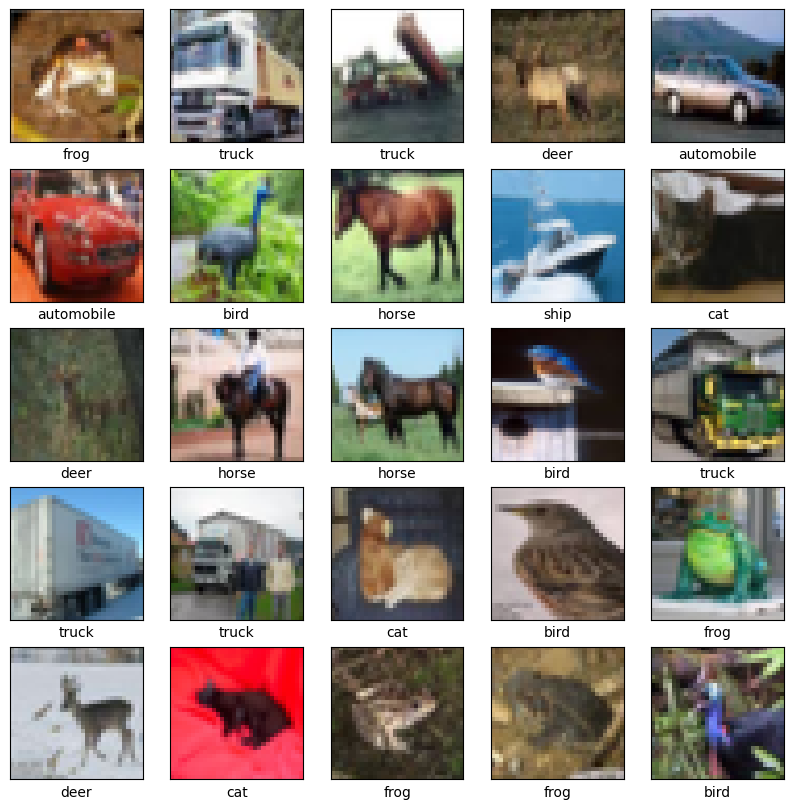

In [ ]:
# Class names in CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()



4. Membangun Model CNN

In [ ]:
# Building the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Adding Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Displaying the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

5. Melatih Model

In [ ]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.5469 - accuracy: 0.4349 - val_loss: 1.2536 - val_accuracy: 0.5521
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.1619 - accuracy: 0.5865 - val_loss: 1.0833 - val_accuracy: 0.6171
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0135 - accuracy: 0.6421 - val_loss: 0.9911 - val_accuracy: 0.6507
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9199 - accuracy: 0.6758 - val_loss: 0.9709 - val_accuracy: 0.6642
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8458 - accuracy: 0.7025 - val_loss: 0.8935 - val_accuracy: 0.6893
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7902 - accuracy: 0.7214 - val_loss: 0.8709 - val_accuracy: 0.7022
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7399 - accuracy: 0.7396 - val_loss: 0.9122 -

6. Mengevaluasi Model

In [ ]:
# Evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 5s - loss: 0.9057 - accuracy: 0.6988 - 5s/epoch - 15ms/step

Test accuracy: 0.6988000273704529


7. Visualisasi Akurasi dan Loss

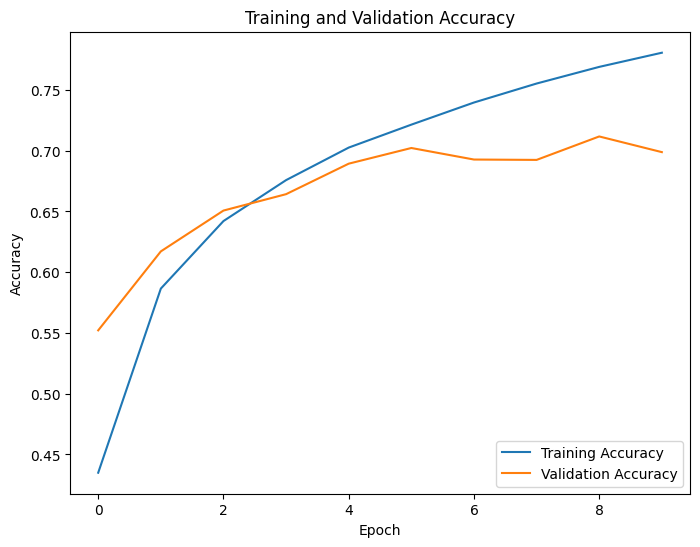

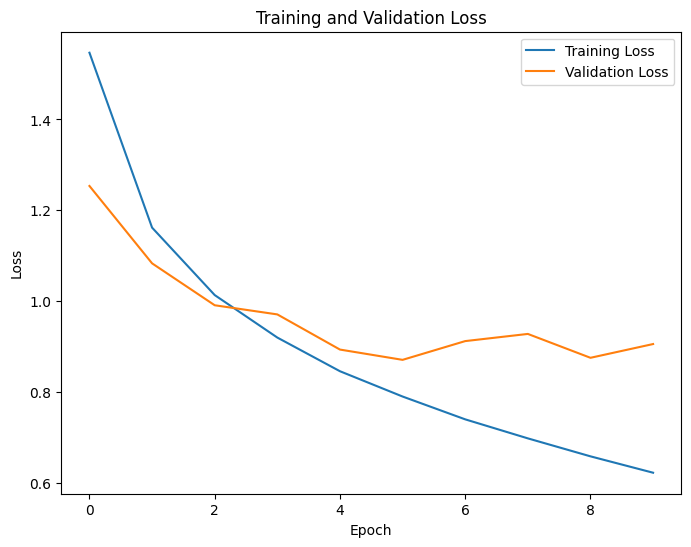

In [ ]:
# Plotting training & validation accuracy values
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Plotting training & validation loss values
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

